In [142]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [137]:
# import the dataset 

data = pd.read_csv('data/q2_data.csv')
data


,Unnamed: 0,X,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,BIKE.USAGE,hour
0,1,1,2018-08-01 12:30:02,CUSTOM HOUSE QUAY,30,0,0,2018-08-01 12:00:00
1,2,2,2018-08-01 12:30:02,THE POINT,40,12,-2,2018-08-01 12:00:00
2,3,3,2018-08-01 12:30:02,GRAND CANAL DOCK,40,1,11,2018-08-01 12:00:00
3,4,4,2018-08-01 12:35:02,CUSTOM HOUSE QUAY,30,0,-9,2018-08-01 12:00:00
4,5,5,2018-08-01 12:35:02,THE POINT,40,12,-2,2018-08-01 12:00:00
...,...,...,...,...,...,...,...,...
1029485,1029486,1029486,2022-01-01 23:50:02,THE POINT,40,11,27,2022-01-01 23:00:00
1029486,1029487,1029487,2022-01-01 23:50:02,GRAND CANAL DOCK,40,3,8,2022-01-01 23:00:00
1029487,1029488,1029488,2022-01-01 23:55:02,CUSTOM HOUSE QUAY,30,28,-35,2022-01-01 23:00:00
1029488,1029489,1029489,2022-01-01 23:55:02,THE POINT,40,11,27,2022-01-01 23:00:00


In [138]:
# need to convert the 'TIME' column to a datetime data type using pandas
data['TIME'] = pd.to_datetime(data['TIME'])

# group the data by half-hour intervals based on the 'TIME' and 'NAME' columns
data = data.groupby([pd.Grouper(key='TIME', freq='30min'), 'NAME']).mean()

# reset the index to turn the group keys into columns
data = data.reset_index()

# print
data


,TIME,NAME,Unnamed: 0,X,BIKE.STANDS,AVAILABLE.BIKE.STANDS,BIKE.USAGE
0,2018-08-01 12:30:00,CUSTOM HOUSE QUAY,8.5,8.5,30.0,0.333333,-7.833333
1,2018-08-01 12:30:00,GRAND CANAL DOCK,10.5,10.5,40.0,1.000000,11.166667
2,2018-08-01 12:30:00,THE POINT,9.5,9.5,40.0,12.166667,-1.833333
3,2018-08-01 13:00:00,CUSTOM HOUSE QUAY,26.5,26.5,30.0,0.000000,-9.000000
4,2018-08-01 13:00:00,GRAND CANAL DOCK,28.5,28.5,40.0,0.833333,10.166667
...,...,...,...,...,...,...,...
136091,2022-01-01 23:00:00,GRAND CANAL DOCK,1029464.5,1029464.5,40.0,2.666667,8.333333
136092,2022-01-01 23:00:00,THE POINT,1029463.5,1029463.5,40.0,11.000000,27.000000
136093,2022-01-01 23:30:00,CUSTOM HOUSE QUAY,1029480.5,1029480.5,30.0,28.000000,-35.000000
136094,2022-01-01 23:30:00,GRAND CANAL DOCK,1029482.5,1029482.5,40.0,3.000000,7.833333


In [139]:
pre_pandemic_data = data[data['TIME'] < '2020-03-12']
post_pandemic_data = data[data['TIME'] >= '2020-03-12']

X_train = pre_pandemic_data[['TIME']]
y_train = pre_pandemic_data['BIKE.USAGE']

X_test = post_pandemic_data[['TIME']]
y_test = post_pandemic_data['BIKE.USAGE']



In [143]:
# Filter out data for 2020
data = data[data['TIME'].astype(str).str.contains('2020')]

# Extract day of the week from date
data['DAY_OF_WEEK'] = pd.to_datetime(data['TIME']).dt.dayofweek


# Split data into training and testing sets
X_train = data[data['TIME'] < '2020-03-12'][['DAY_OF_WEEK']]
y_train = data[data['TIME'] < '2020-03-12']['BIKE.USAGE']
X_test = data[data['TIME'] >= '2020-03-12'][['DAY_OF_WEEK']]
y_test = data[data['TIME'] >= '2020-03-12']['BIKE.USAGE']

# Fit linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict bike usage for pre-pandemic times
y_pred_train = regressor.predict(X_train)

# Predict bike usage for post-pandemic times
y_pred_test = regressor.predict(X_test)


In [144]:
# Calculate MAE and RMSE on test set
mae = mean_absolute_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print('MAE:', mae)
print('RMSE:', rmse)

MAE: 11.05819305524463
RMSE: 13.69602338470467


An MAE of 11.058 and an RMSE of 13.696 means that on average, the predicted values are off by about 11 bike usage counts and the standard deviation of the error is about 14 bike usage counts.

ValueError: x and y must have same first dimension, but have shapes (39630,) and (252,)

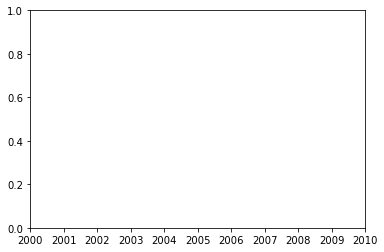

In [146]:
#Plot Price VS Engine Size
plt.scatter(selected_dataset.enginesize, selected_dataset.price)
plt.xlabel('Size of Engine (Cubic Inches)')
plt.ylabel('Price of Car (Dollars)')

plt.show()